<a href="https://www.kaggle.com/code/oscarm524/ps-s3-ep21-eda-modeling-submission?scriptVersionId=140941310" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#1)

[2. Loading Libraries](#2)

[3. Reading Data Files](#3)

[4. Data Exploration](#4)

[5. Baseline Modeling 1.0](#5)

[6. Baseline Modeling 2.0](#6)


<a id="1"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

- Version 1 (08/21/2023)
    * EDA 
    * Dummy baseline submission
    
    
- Version 2 (08/22/2023)
    * Updating baseline modeling 1.0
    

- Version 3 (08/22/2023)
    * Updating baseline modeling 1.0
        
        
- Version 4 (08/23/2023)
    * Baseline modeling 2.0 added
    

- Version 5 (08/23/2023)
    * Fixing bug
    

- Version 6 (08/24/2023)
    * Updating baseline modeling 1.0


- Version 7 (08/24/2023)
    * Updating baseline modeling 1.0
        
<a id="2"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>    

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold, GroupKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay, DecisionBoundaryDisplay, permutation_importance
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, IsolationForest
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

<a id="3"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('../input/playground-series-s3e21/sample_submission.csv')
original = pd.read_csv('../input/dissolved-oxygen-prediction-in-river-water/train.csv')

print('The dimension of the train dataset is:', train.shape)
print('The dimension of the original train dataset is:', original.shape)

The dimension of the train dataset is: (3500, 37)
The dimension of the original train dataset is: (147, 37)


In [3]:
train.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,0.397956,1.036098,7.074487,14.709377,0.466592,0.540403,0.08223,0.113137,0.097065,0.724153,1.190117,0.065045,0.230348,1.944999,2.184933,4.351799,10.866664,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1010.507298,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,0.452237,0.595943,5.279023,51.402198,0.311071,0.288486,0.10647,0.198144,0.082717,0.352611,0.634958,0.075737,0.213995,1.691173,1.496552,4.329417,6.003792,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,0.000000,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,0.120000,0.252000,0.848000,0.052000,0.052000,0.00000,0.006000,0.000000,-4.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.515000,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,874.750000,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,0.200000,0.650000,3.850000,8.415000,0.310000,0.429000,0.03800,0.040000,0.040000,0.560000,0.848000,0.056000,0.071000,0.790000,1.205000,2.020000,5.240000,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1749.500000,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,0.698000,5.560000,12.175000,0.380000,0.429000,0.05800,0.060000,0.074000,0.805000,1.075000,0.056000,0.150000,1.600000,1.855000,2.095000,7.980000,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,2624.250000,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,1.640000,10.090000,16.645000,0.429000,0.440000,0.07500,0.095000,0.134000,0.902000,1.454000,0.071000,0.191000,2.400000,2.600000,4.960000,16.925000,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,3499.000000,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,14.515000,46.800000,3026.000000,2.680000,2.600000,0.95000,2.347000,2.050000,3.980000,8.400000,1.560000,2.120000,28.500000,10.580000,21.700000,29.030000,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


There are not missing values in the `train` dataset. 

<a id="4"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1>

First, we start by visualizing `target`, the variable of interest.

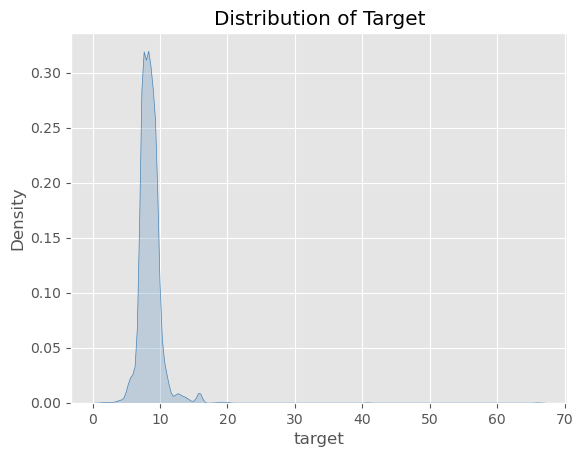

In [4]:
sns.kdeplot(data = train, x = 'target', fill = True, color = 'steelblue').set_title('Distribution of Target');

From the above chart, we can see the following:

- There is one big peak around 8.
- There is one small peak around 15.
- There are a two `target` values greater than 20.

Next, we explore relationships among `target` and the other features.

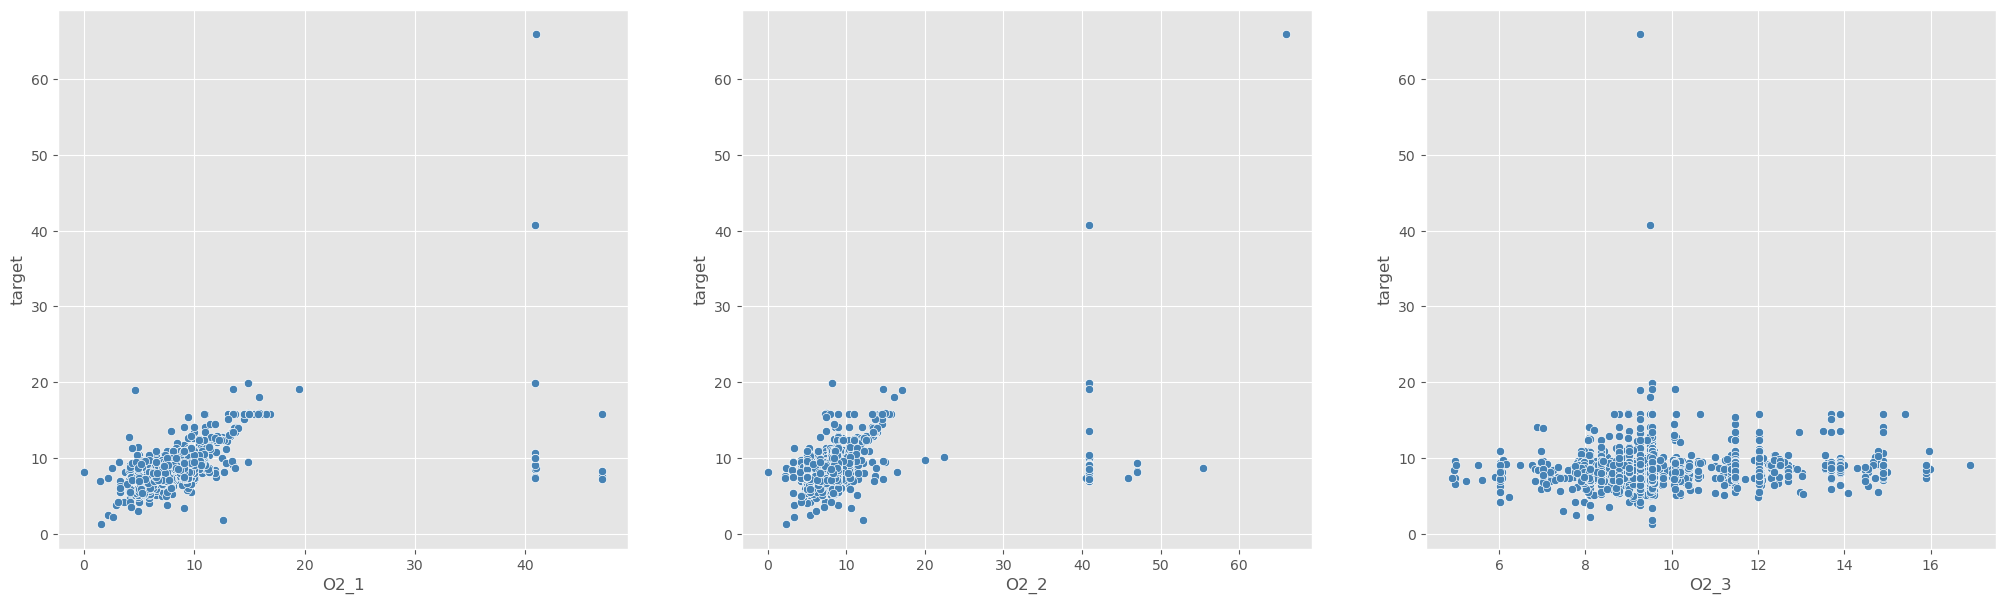

In [5]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'O2_1', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'O2_2', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'O2_3', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are some observations with `O2_1` values greater than 40 (different from other values).
- For `O2_1` values less than 20, the relationship between `O2_1` and `target` seems to be roughly linear.
- There are some observations with `O2_2` values greater than 40 (different from other values).

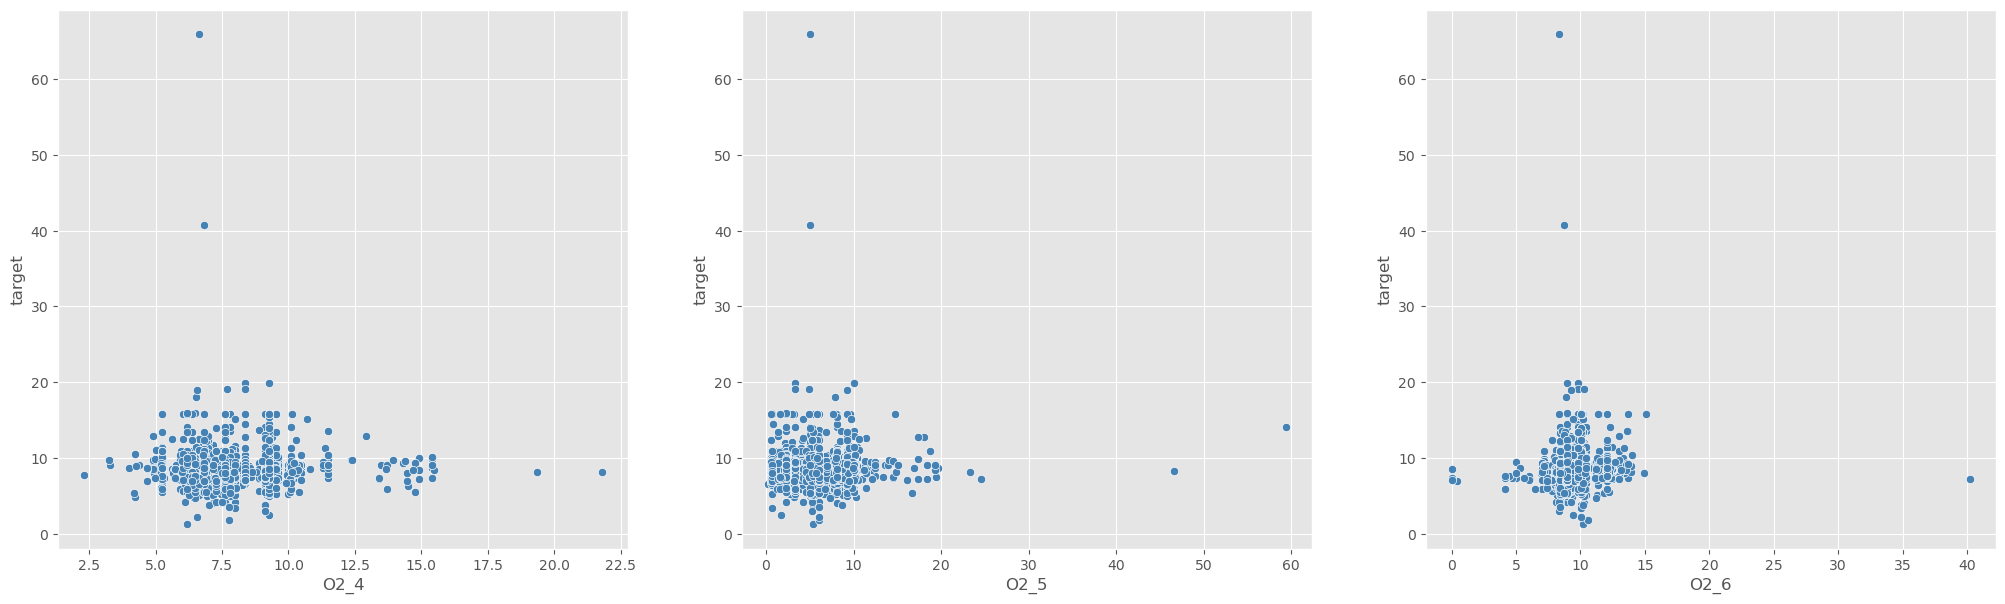

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'O2_4', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'O2_5', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'O2_6', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are some *outliers* in `O2_4`, `O2_5`, and `O2_6`. 


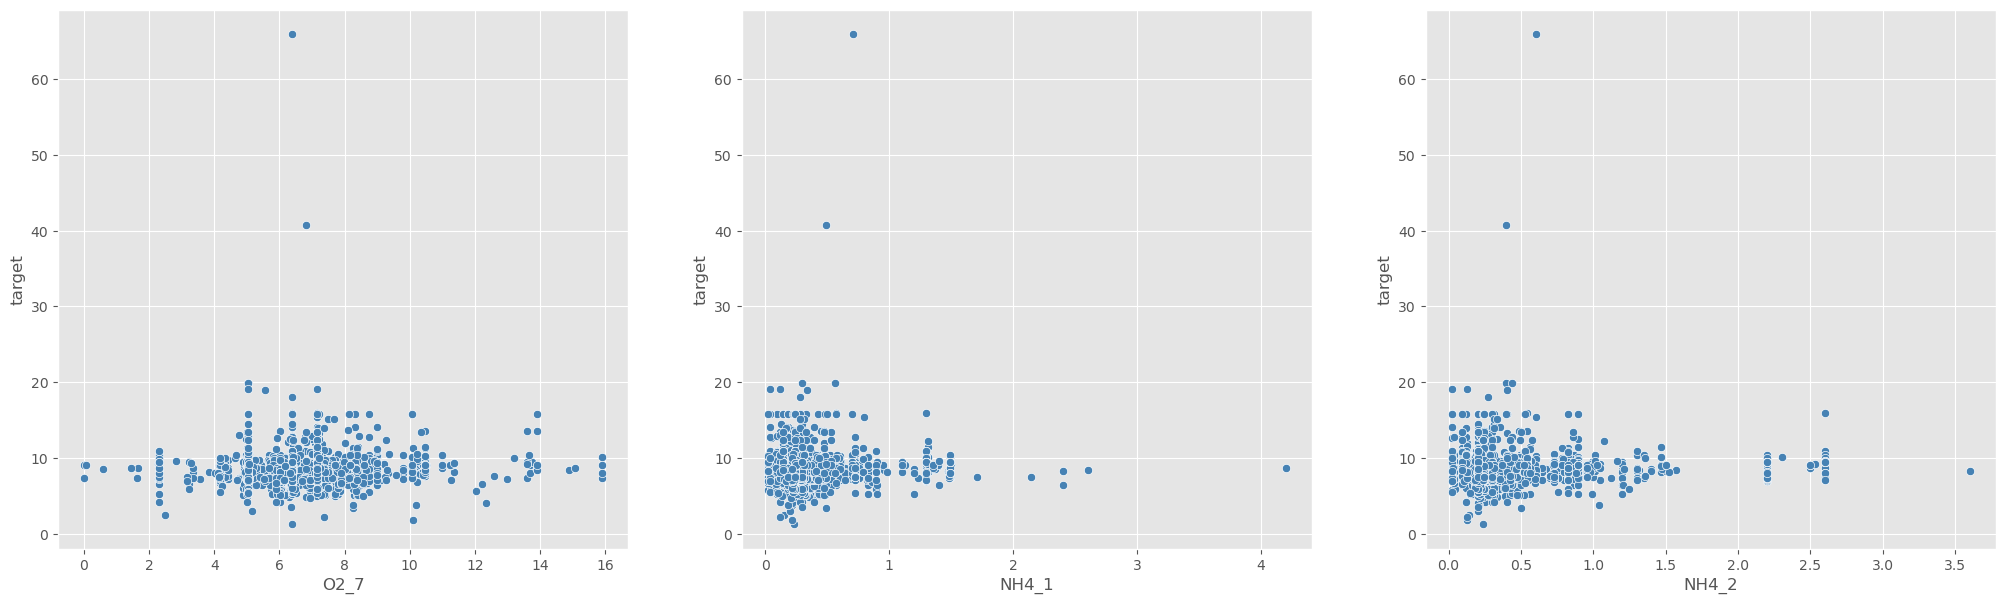

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'O2_7', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NH4_1', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NH4_2', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are some *outliers* in `NH4_1` and `NH4_2`.

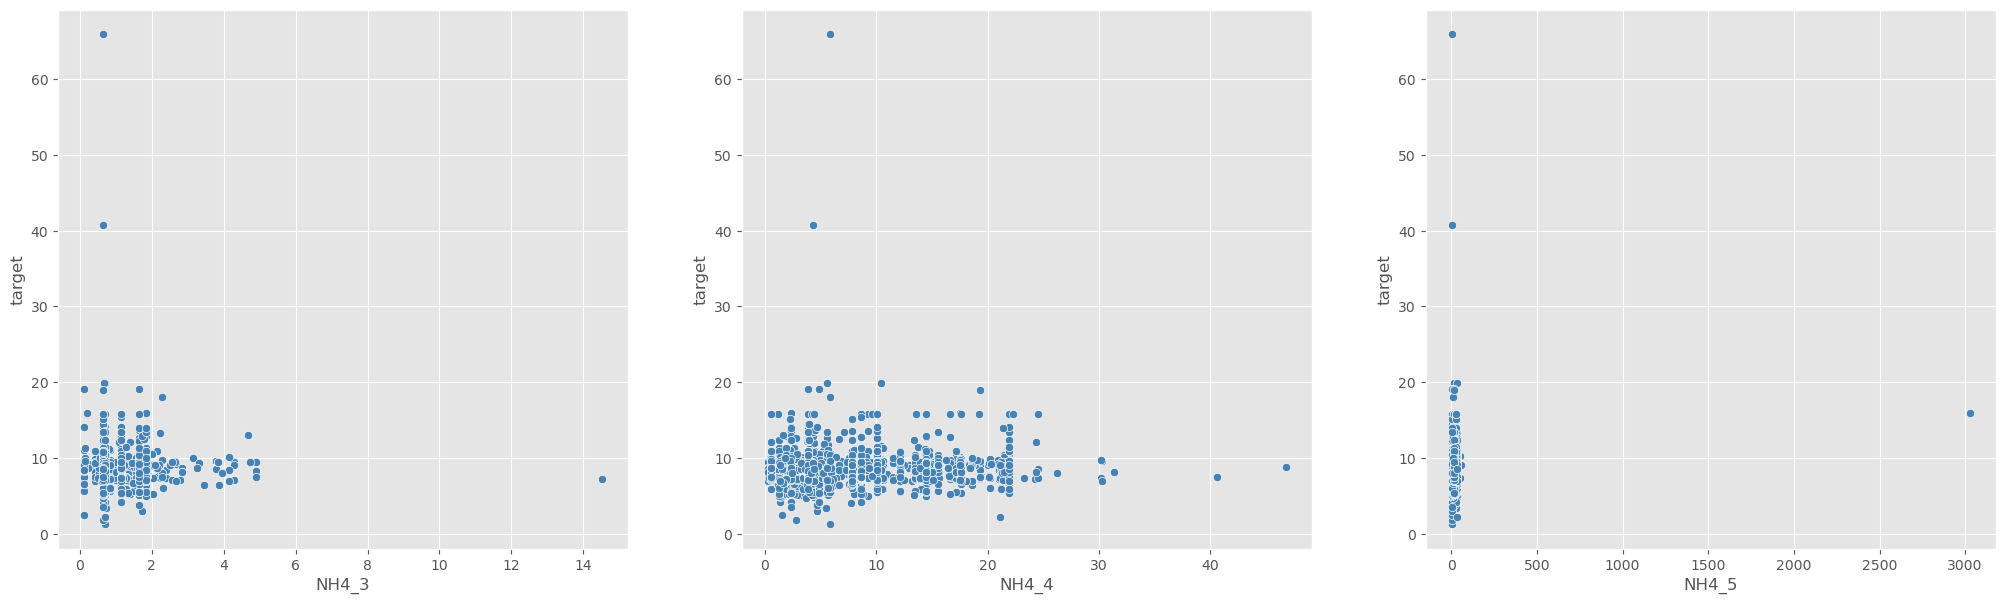

In [8]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NH4_3', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NH4_4', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NH4_5', y = 'target', color = 'steelblue');

From the above, we see the following:

- There is an outlier in `NH4_3`.
- There are some outliers in `NH4_4`.
- There is an outlier in `NH4_5`.

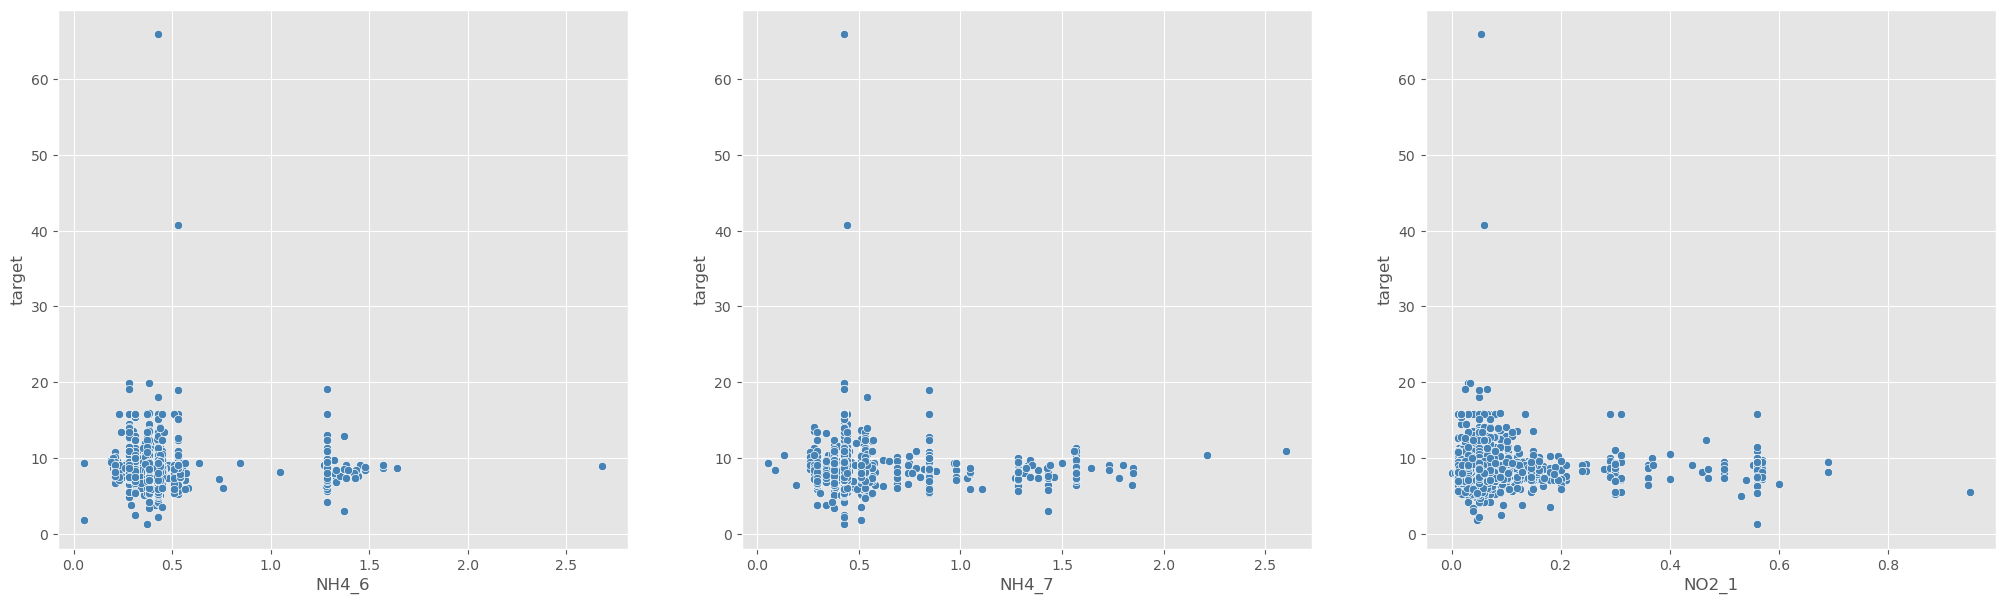

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NH4_6', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NH4_7', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NO2_1', y = 'target', color = 'steelblue');

From the above, we see the following:

- It is seems that there are two groups of observations in `NH4_6`. Also, there is an outlier.
- There are a couple of outliers in `NH4_7` and `NO2_1`. 

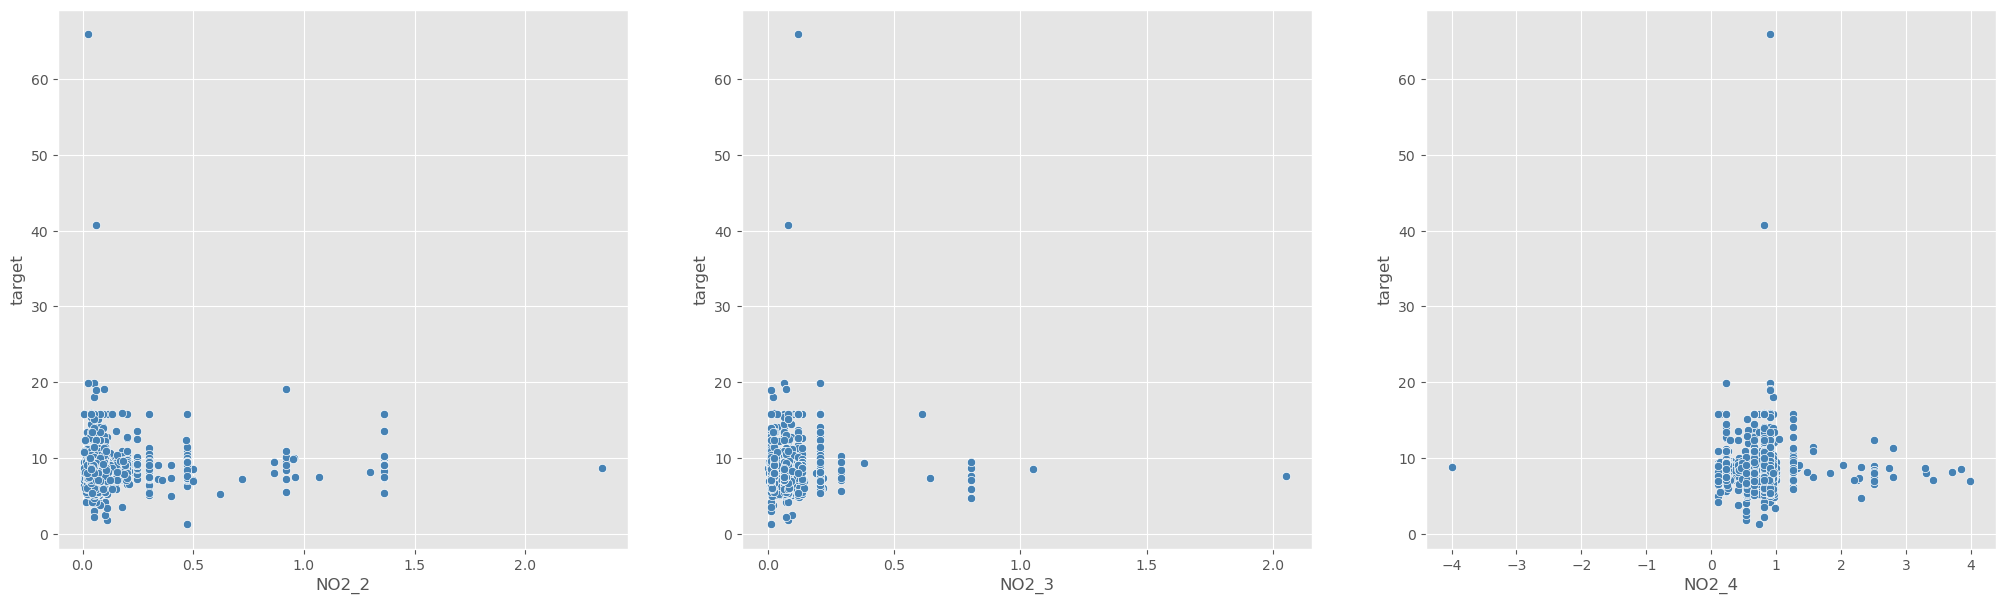

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NO2_2', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NO2_3', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NO2_4', y = 'target', color = 'steelblue');

From the above, we see the following:

- There is an outlier in `NO2_2`.
- There are a couple of outliers in `NO2_3`.
- There is an outlier in `NO2_4`.

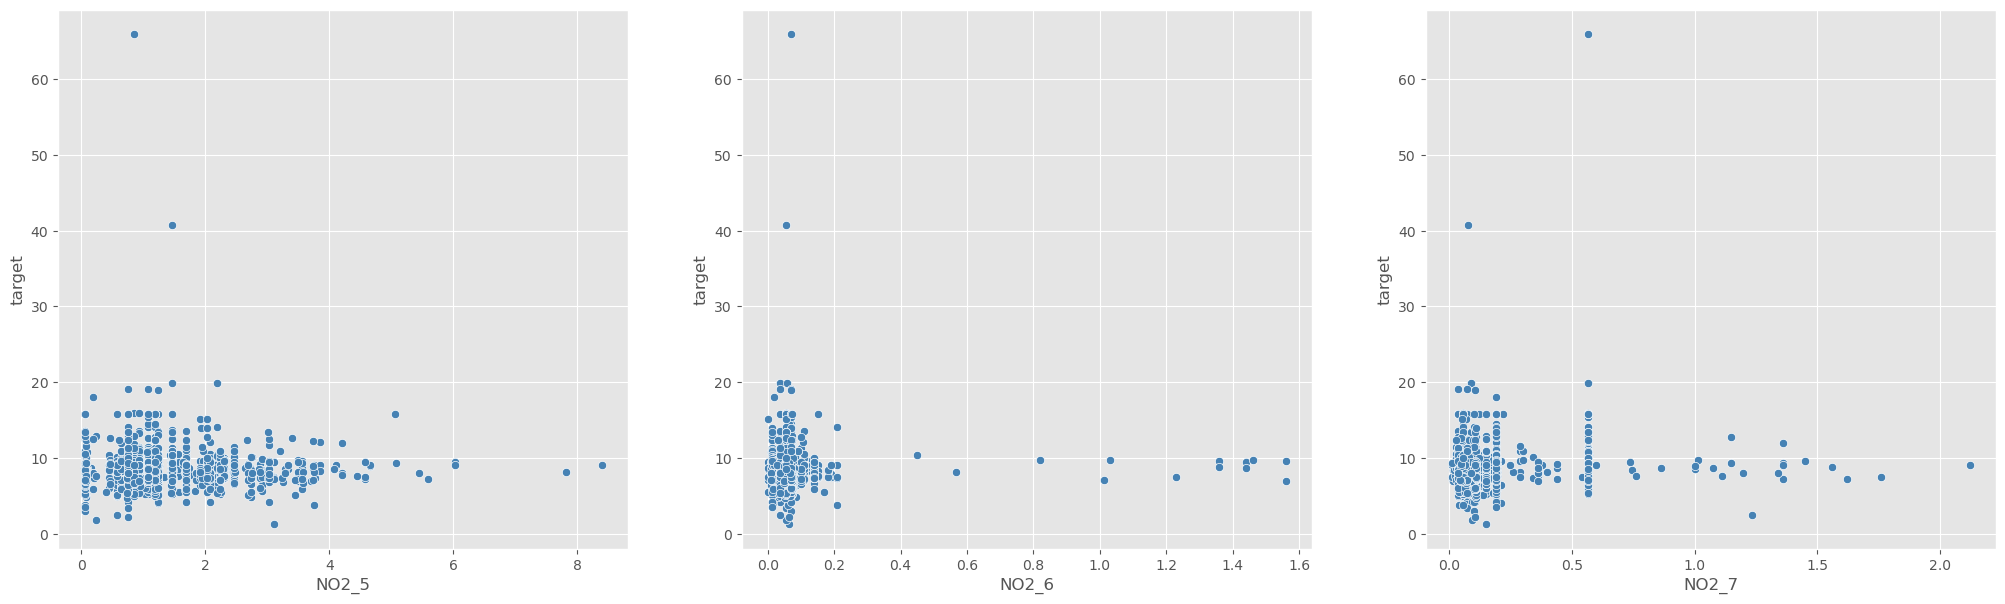

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NO2_5', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NO2_6', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NO2_7', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are a couple of outliers in `NO2_5`.
- Some data points in `N02_6` and `N02_7` are sparse.

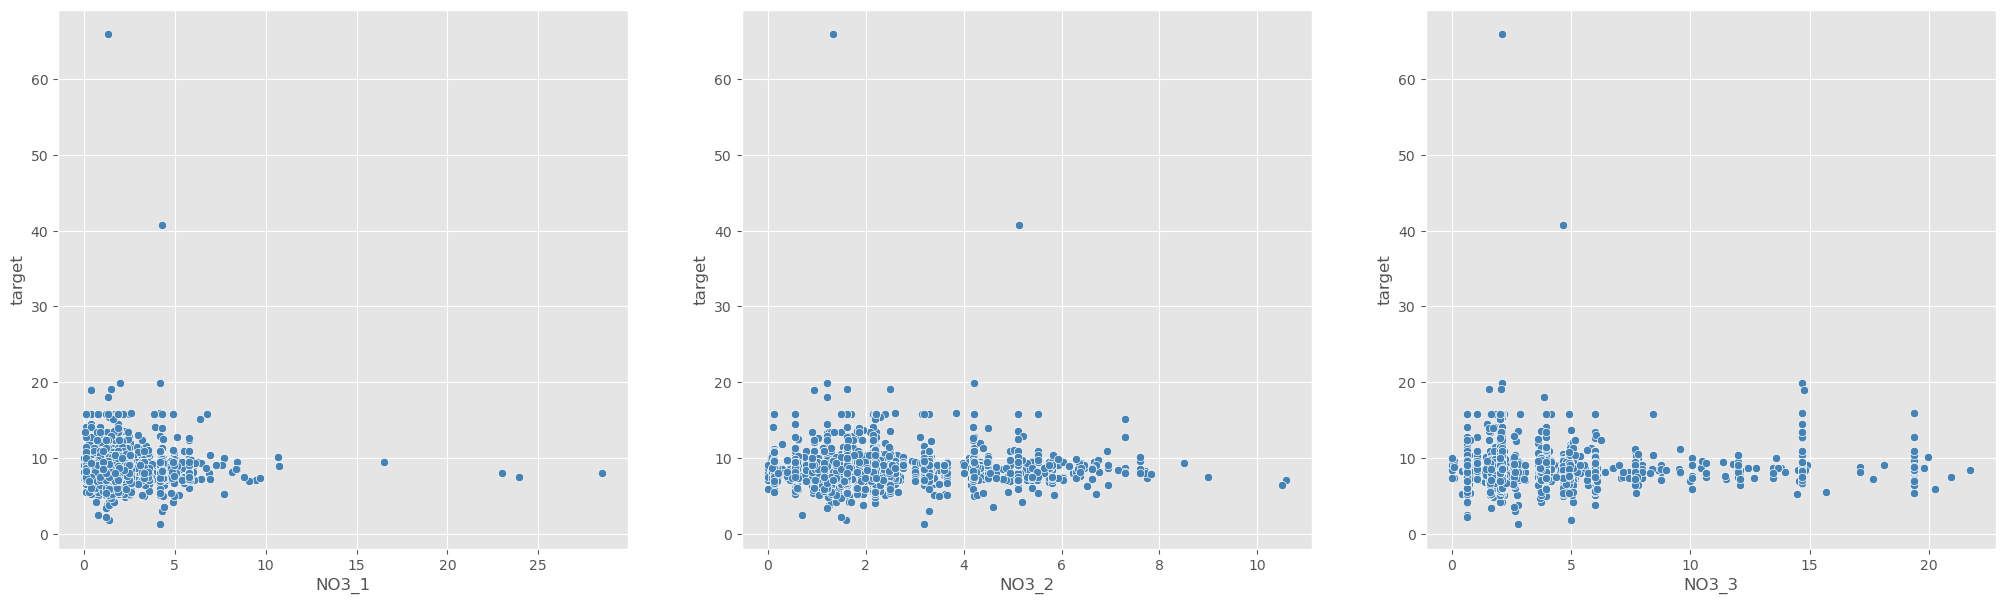

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NO3_1', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NO3_2', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NO3_3', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are a couple of outliers in `NO3_1`.
- Some data points in `NO3_2` and `NO3_3` are sparse.

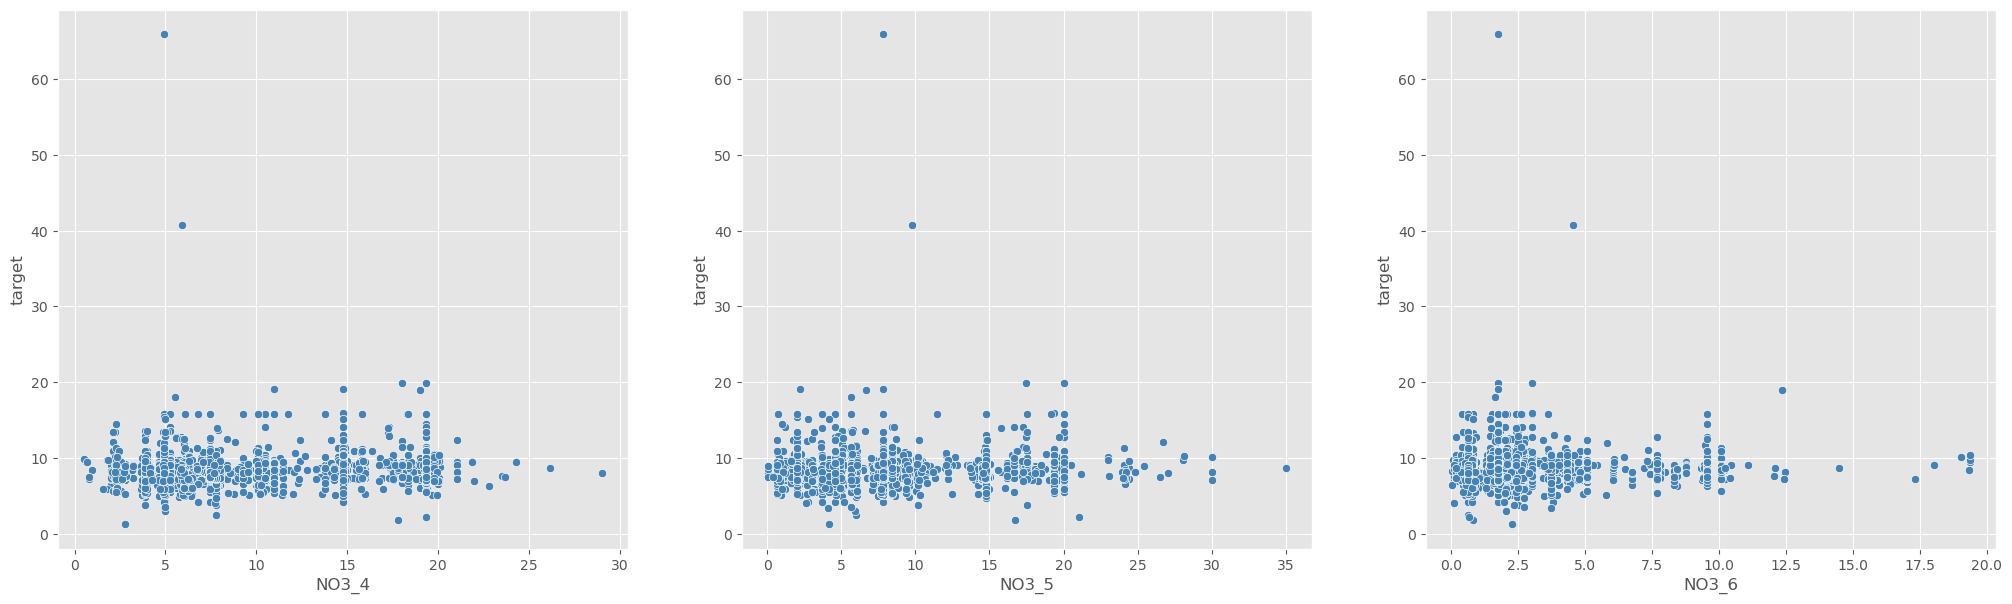

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NO3_4', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NO3_5', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NO3_6', y = 'target', color = 'steelblue');

From the above, we see the following:

- Some data points in `NO3_4` and `NO3_5` are sparse.
- There are a couple of outliers in `NO3_6`.

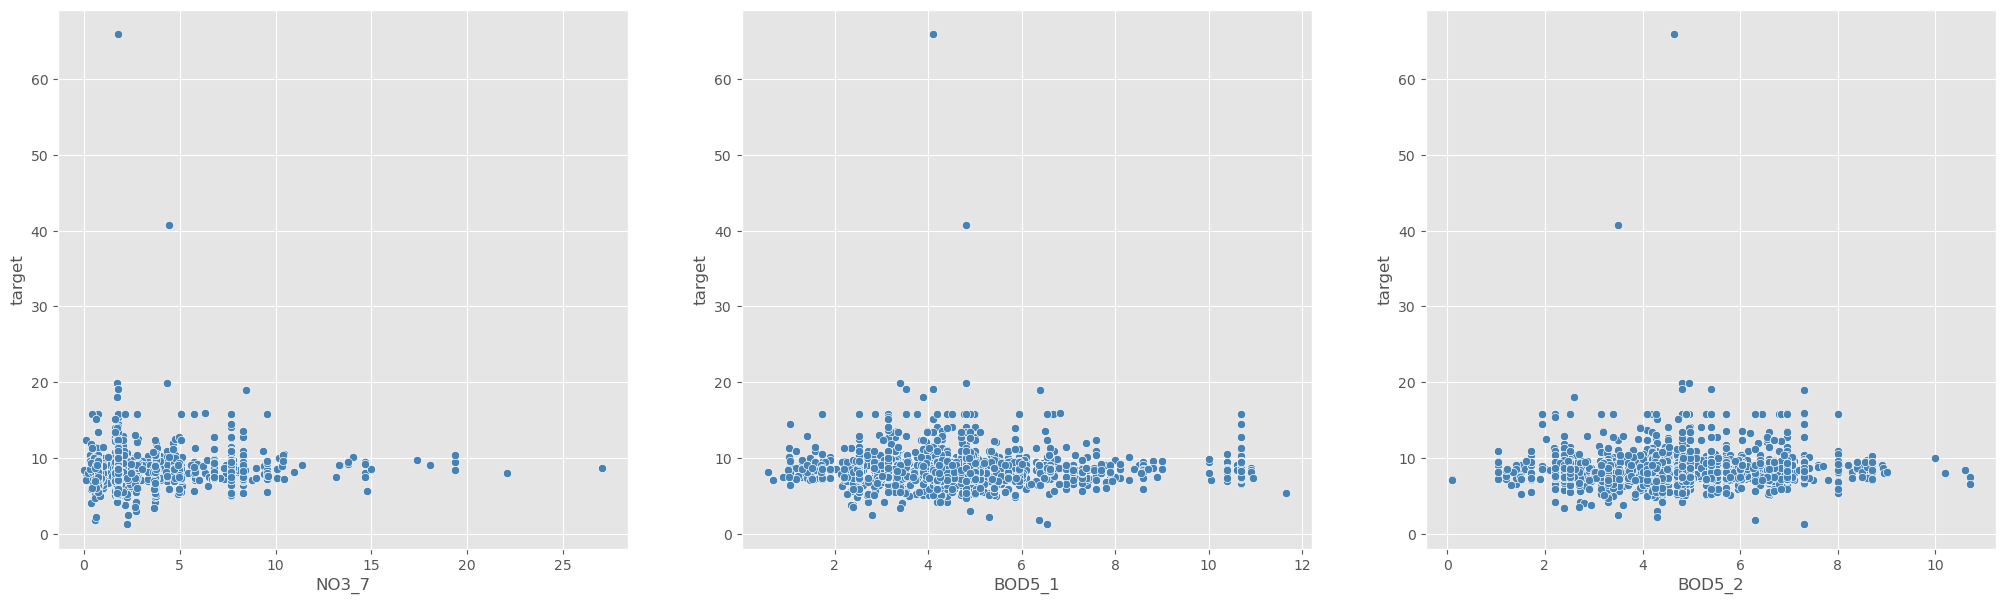

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NO3_7', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'BOD5_1', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'BOD5_2', y = 'target', color = 'steelblue');

From the above, we see the following:

- Some data points in `NO3_7` are sparse.
- There are some observations in `BOD5_1` that have a higher value compared to the other data points. 
- It seems that there are couple of outliers in `BOD5_2`.

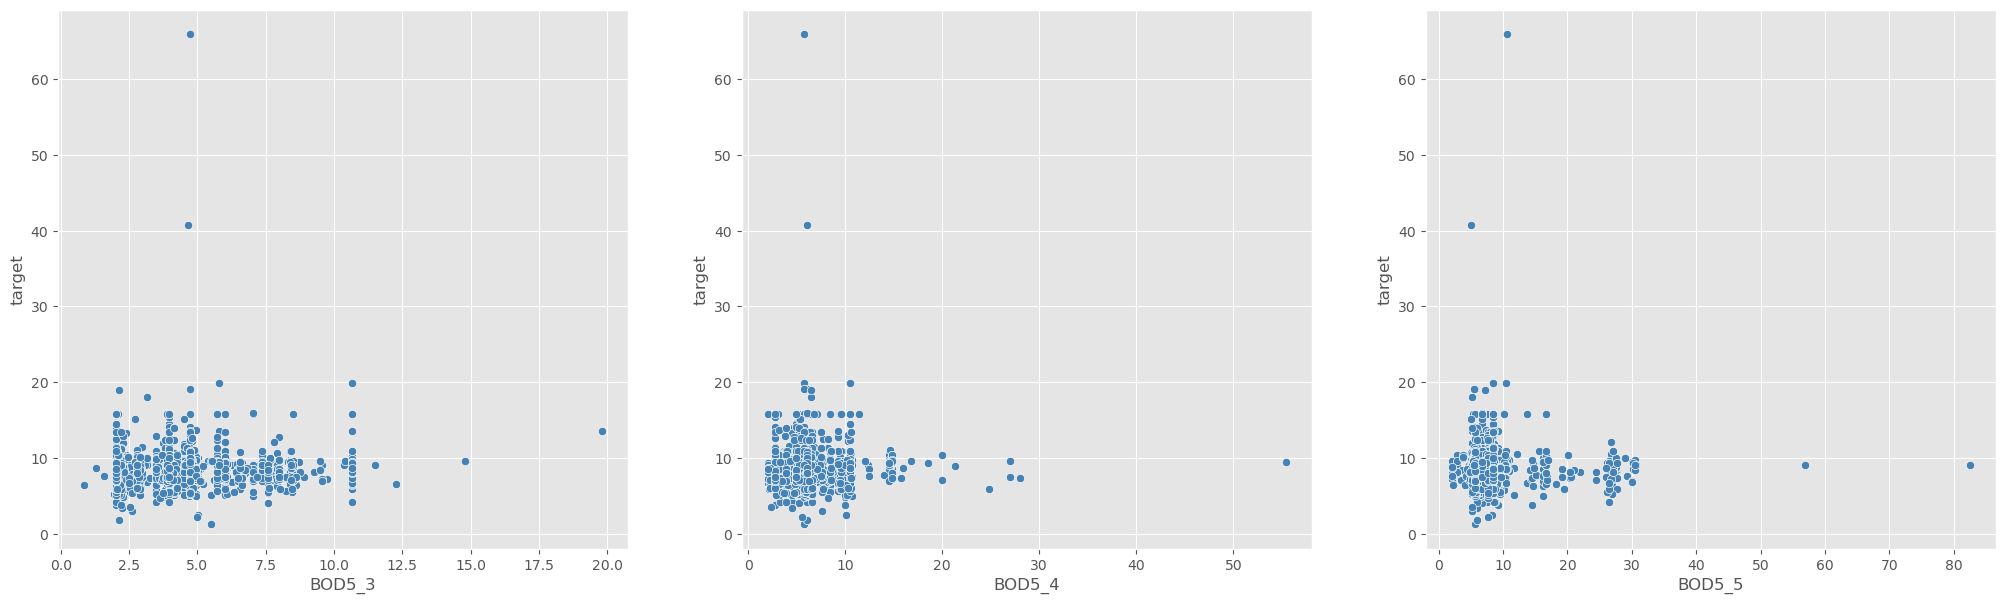

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'BOD5_3', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'BOD5_4', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'BOD5_5', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are a couple of outliers in `BOD5_3`, `BOD5_4`, and `BOD5_5`.

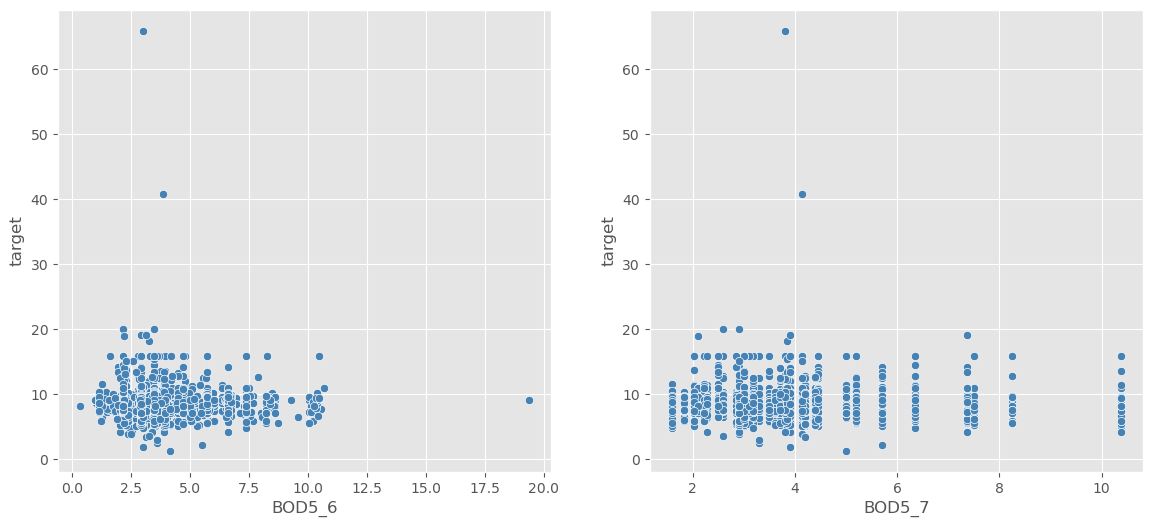

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.scatterplot(ax = axes[0], data = train, x = 'BOD5_6', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'BOD5_7', y = 'target', color = 'steelblue');

From the above, we see the following:

- There is one outlier in `BOD5_6`.
- Some of the data points in `BOD5_7` are sparse.

So far, we explore bivariate relationships among the `target` and the input features. Next, we explore if we can reduce the number of feature by applying `PCA` in each of the group features.

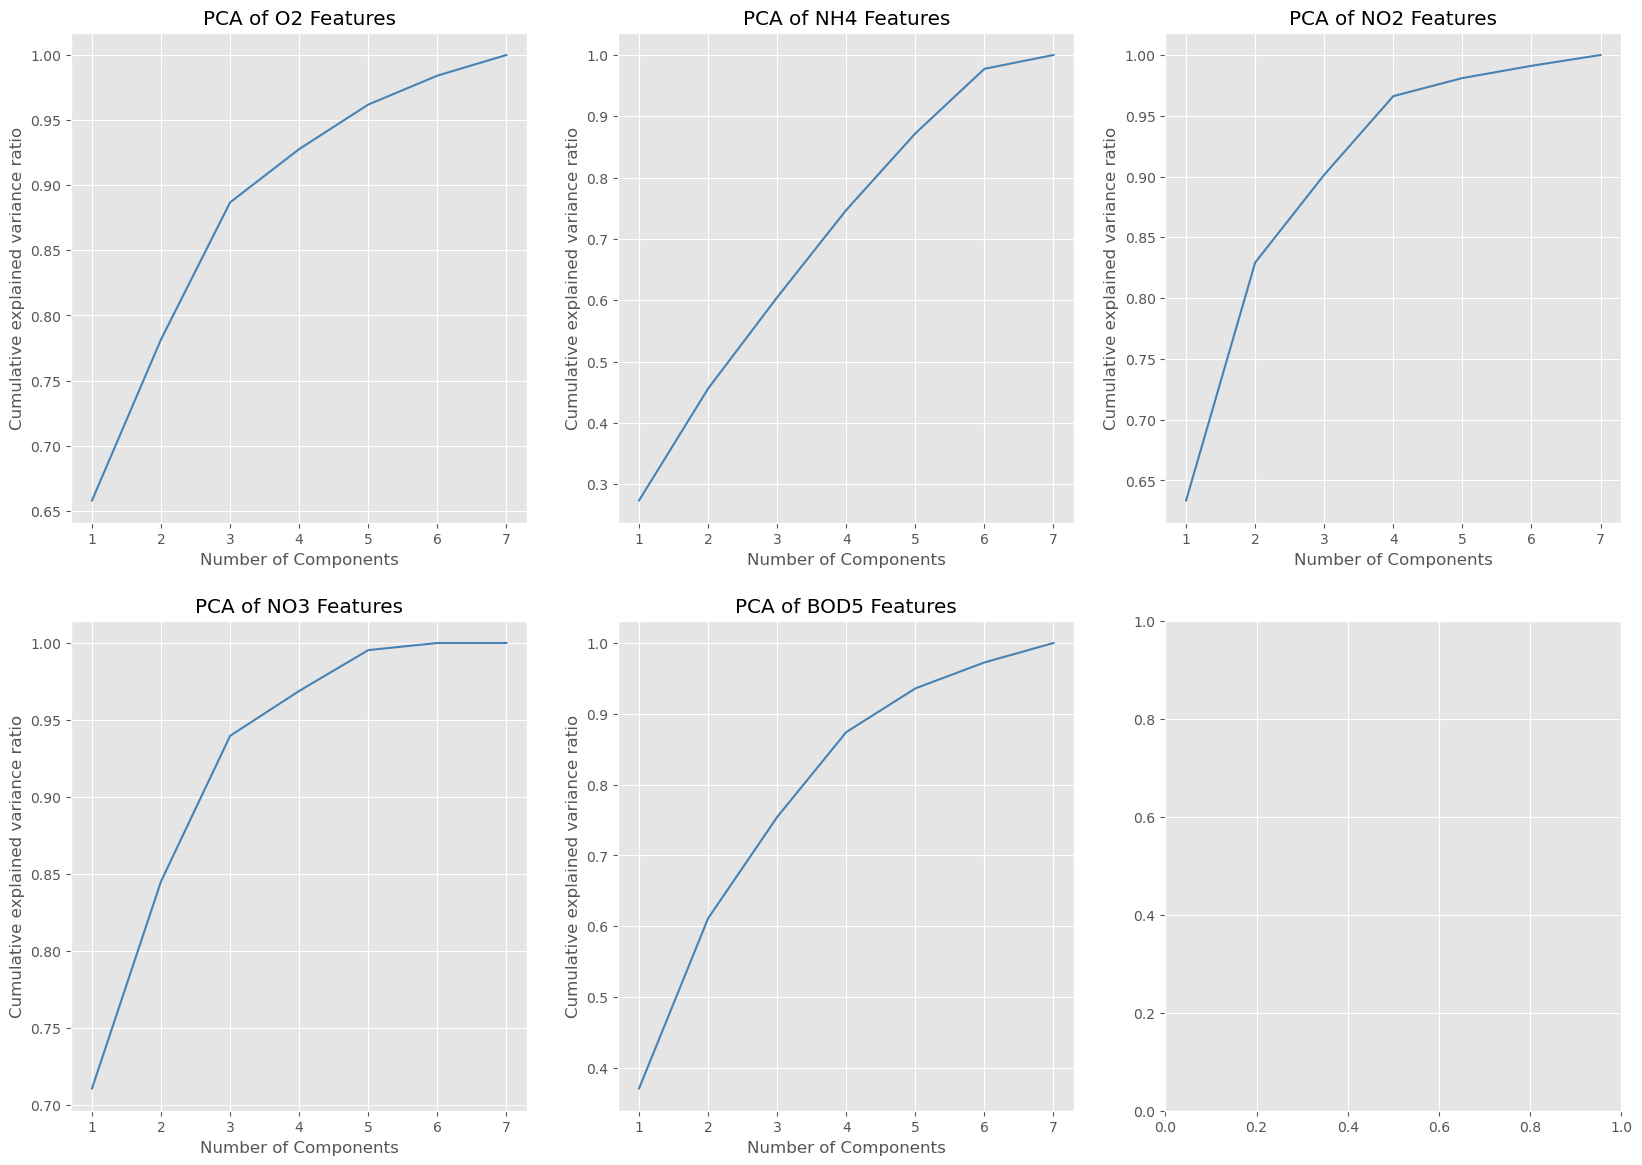

In [17]:
scaler = StandardScaler().set_output(transform = 'pandas')

X1 = train[['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7']].copy()
pca_md_1 = PCA().fit(X1)

X2 = train[['NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7']].copy()
X2 = scaler.fit_transform(X2)
pca_md_2 = PCA().fit(X2)

X3 = train[['NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7']].copy()
pca_md_3 = PCA().fit(X3)

X4 = train[['NO3_1', 'NO3_2', 'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_5']].copy()
pca_md_4 = PCA().fit(X4)

X5 = train[['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']].copy()
pca_md_5 = PCA().fit(X5)

fig, axes = plt.subplots(2, 3, figsize = (20, 14))

xloc = [i for i in range(1, 8)]
sns.lineplot(ax = axes[0, 0], x = xloc,  y = pca_md_1.explained_variance_ratio_.cumsum(), color = 'steelblue')
axes[0, 0].set(xlabel = 'Number of Components', ylabel = 'Cumulative explained variance ratio', title = 'PCA of O2 Features');

sns.lineplot(ax = axes[0, 1], x = xloc,  y = pca_md_2.explained_variance_ratio_.cumsum(), color = 'steelblue')
axes[0, 1].set(xlabel = 'Number of Components', ylabel = 'Cumulative explained variance ratio', title = 'PCA of NH4 Features');

sns.lineplot(ax = axes[0, 2], x = xloc,  y = pca_md_3.explained_variance_ratio_.cumsum(), color = 'steelblue')
axes[0, 2].set(xlabel = 'Number of Components', ylabel = 'Cumulative explained variance ratio', title = 'PCA of NO2 Features');

sns.lineplot(ax = axes[1, 0], x = xloc,  y = pca_md_4.explained_variance_ratio_.cumsum(), color = 'steelblue')
axes[1, 0].set(xlabel = 'Number of Components', ylabel = 'Cumulative explained variance ratio', title = 'PCA of NO3 Features');

sns.lineplot(ax = axes[1, 1], x = xloc,  y = pca_md_5.explained_variance_ratio_.cumsum(), color = 'steelblue')
axes[1, 1].set(xlabel = 'Number of Components', ylabel = 'Cumulative explained variance ratio', title = 'PCA of BOD5 Features');

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #2D425E;
    border-bottom: 2px solid #E04C5F;
">
    <b> Observations from EDA </b> 💡
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
">
    <li> - Most of the input features have outliers.</li>
    <li> - <code>target</code> has two big outliers.</li>
    <li> - <code>target</code> does not seem to have a relationship with most input features.</li>
    <li> - <code>target</code> seems to have some relationship with <code>O2_1</code> and <code>O2_2</code>.</li>
    <li> - Five PCA components seems enough to explain most of the variability in each of the group of features.</li>
    
</p>

<a id="5"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 1.0</h1>

In this section, we attempt our first submission by identifying outliers in the input features via [IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html), and then removing them. This was inspired by this [notebook](https://www.kaggle.com/code/carlmcbrideellis/ps-s3-e21-remove-outliers-via-isolation-forest) from @carlmcbrideellis.

One of the important parameters in the `IsolationForest` algorithm is `contamination`, which is the the proportion of outliers in the dataset used when fitting to define the threshold on the scores of the samples. So, we run a simple experiment to determine the optimal `contamination` value. First, we remove the two big outliers in `target`.

In [18]:
train = pd.read_csv('../input/playground-series-s3e21/sample_submission.csv')
train = train[train['target'] <= 20]

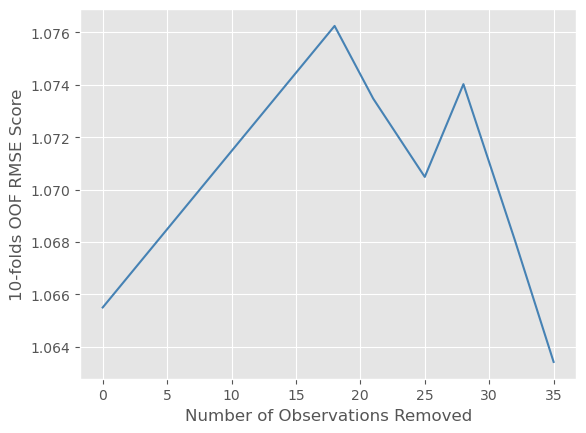

In [19]:
def contamination_looping(data):
    
    X = data.drop(columns = ['id', 'target'], axis = 1).copy()
    
    outliers_remove = list()
    outliers_remove.append(0)
    
    rmse_results = list()
    rmse_results.append(cv_experiments(data))
    
    for i in [0.005, 0.006, 0.007, 0.008, 0.009, 0.01]: # contamination values to be considered
        
        isolation_md = IsolationForest(n_estimators = 2000, contamination = i, random_state = 42, n_jobs = -1).fit(X)
        outlier_label = isolation_md.predict(X)
        outliers_remove.append(sum(outlier_label == -1))
        
        data_temp = data[outlier_label == 1]
        rmse_results.append(cv_experiments(data_temp))
    
    return [outliers_remove, rmse_results]


def cv_experiments(data):
    
    X = data.drop(columns = ['id', 'target'], axis = 1)
    Y = data['target']
    
    rmse_scores = list()
    skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
    
    for i, (train_ix, test_ix) in enumerate(skf.split(X, Y)):
        
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        ###################
        ## Random Forest ##
        ###################

        RF_md = RandomForestRegressor(n_estimators = 1000,
                                      max_depth = 7,
                                      n_jobs = -1,
                                      random_state = 42).fit(X_train, Y_train)

        RF_pred = RF_md.predict(X_test)
        rmse_score = mean_squared_error(Y_test, RF_pred, squared = False)
        rmse_scores.append(rmse_score)
    
    return np.mean(rmse_scores)

result_cont = contamination_looping(train)
plot = sns.lineplot(x = result_cont[0], y = result_cont[1], color = 'steelblue')
plot.set(xlabel = 'Number of Observations Removed', ylabel = '10-folds OOF RMSE Score'); 

The above chart suggests to remove 35 observations. 

In [20]:
cont = [0, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cont_to_consider = cont[np.argsort(result_cont[1])[0]]

X = train.drop(columns = ['id', 'target'], axis = 1).copy()
isolation_md = IsolationForest(n_estimators = 2000, contamination = cont_to_consider, random_state = 42).fit(X)
train['outlier_label'] = isolation_md.predict(X)
train_no_outlier = train[train['outlier_label'] == 1]
train_no_outlier = train_no_outlier.drop(columns = ['outlier_label'], axis = 1)

# Re-running the cv-routine on data without outliers
results = cv_experiments(train_no_outlier)
print('The 10-fold oof RMSE (data without outliers) is', results)

The 10-fold oof RMSE (data without outliers) is 1.0634192090014882


Next, we identify important features to predict `target` using the `permutation_importance` algorithm.

In [21]:
def run_perm_imp(data, num_runs):
    
    X = data.drop(columns = ['id', 'target'], axis = 1)
    Y = data['target']  
    
    imp_results = list()
    
    skf = RepeatedKFold(n_splits = 10, n_repeats = num_runs, random_state = 42)
    for i, (train_ix, test_ix) in enumerate(skf.split(X, Y)):
        
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        RF_md = RandomForestRegressor(n_estimators = 1000,
                                      max_depth = 7,
                                      n_jobs = -1,
                                      random_state = 42).fit(X_train, Y_train)
        
        result_imp = permutation_importance(RF_md, X_test, Y_test, 
                                            scoring = 'neg_root_mean_squared_error', 
                                            n_repeats = 20, 
                                            random_state = 42)
        
        imp_results.append(result_imp.importances)
        
    
    imp_results_mean = np.mean(np.concatenate(imp_results, axis = 1), axis = 1)
    imp_results_sd = np.std(np.concatenate(imp_results, axis = 1), ddof = 1, axis = 1)
    
    for i in imp_results_mean.argsort()[::-1]:

        print(f'{X.columns[i]:<8}'
              f'{imp_results_mean[i]:.3f}'
              f' +/- {imp_results_sd[i]:.3f}')
    
    data_out = pd.DataFrame({'Feature': X.columns, 
                             'Mean': imp_results_mean,
                             'SD': imp_results_sd})
    
    data_out = data_out.sort_values(by = 'Mean', ascending = False)
    data_out = data_out.reset_index(drop = True)
    
    return data_out

out = run_perm_imp(train_no_outlier, num_runs = 1)

O2_1    0.712 +/- 0.169
O2_2    0.029 +/- 0.032
O2_4    0.008 +/- 0.006
NO2_2   0.005 +/- 0.009
BOD5_3  0.002 +/- 0.004
NH4_5   0.001 +/- 0.002
O2_5    0.001 +/- 0.002
NH4_4   0.001 +/- 0.002
NH4_6   0.001 +/- 0.002
NO3_5   0.001 +/- 0.005
NH4_3   0.001 +/- 0.003
NO3_4   0.001 +/- 0.002
O2_3    0.001 +/- 0.002
O2_7    0.001 +/- 0.002
NO2_4   0.000 +/- 0.002
NO2_7   0.000 +/- 0.002
NO2_6   0.000 +/- 0.003
NH4_2   0.000 +/- 0.005
BOD5_1  0.000 +/- 0.002
NO3_2   0.000 +/- 0.002
NO2_3   0.000 +/- 0.002
NH4_1   -0.000 +/- 0.004
NO2_5   -0.000 +/- 0.001
NH4_7   -0.000 +/- 0.002
NO3_7   -0.000 +/- 0.006
BOD5_7  -0.000 +/- 0.001
BOD5_4  -0.000 +/- 0.003
NO3_1   -0.001 +/- 0.002
NO3_3   -0.001 +/- 0.003
BOD5_2  -0.001 +/- 0.002
NO2_1   -0.001 +/- 0.003
BOD5_5  -0.001 +/- 0.003
BOD5_6  -0.001 +/- 0.002
O2_6    -0.001 +/- 0.003
NO3_6   -0.001 +/- 0.007


Next, we select the top ten featues and build a few models with those features.

In [22]:
def feat_cv_experiments(data, features):

    rmse_score = list()
    rmse_score.append(feat_cv_experiments_help(data.drop(columns = ['id', 'target'], axis = 1),
                                               data['target']))

    model = list()
    model.append('baseline_no_outliers')
    
    for i in range(1, (len(features) + 1)):

        X = data[features[:i]]
        Y = data['target']
        
        rmse_score.append(feat_cv_experiments_help(X, Y))
        model.append(features[:i])
        
    return [model, rmse_score]
        
        
def feat_cv_experiments_help(X, Y):        
    
    rmse_scores = list()
    skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
    
    for i, (train_ix, test_ix) in enumerate(skf.split(X, Y)):
        
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        RF_md = RandomForestRegressor(n_estimators = 1000,
                                      max_depth = 7,
                                      n_jobs = -1,
                                      random_state = 42).fit(X_train, Y_train)

        RF_pred = RF_md.predict(X_test)
        rmse_score = mean_squared_error(Y_test, RF_pred, squared = False)
        rmse_scores.append(rmse_score)
    
    return np.mean(rmse_scores)

In [23]:
feat_to_consider = out['Feature'][0:10].tolist()
results = feat_cv_experiments(train_no_outlier, feat_to_consider)

results_df = pd.DataFrame(results[1])
results_df.columns = ['RMSE']
results_df.index = results[0]
results_df = results_df.sort_values(by = 'RMSE')
results_df

,RMSE
"[O2_1, O2_2, O2_4, NO2_2, BOD5_3, NH4_5, O2_5, NH4_4]",1.042637
"[O2_1, O2_2, O2_4, NO2_2, BOD5_3, NH4_5, O2_5]",1.043434
"[O2_1, O2_2, O2_4, NO2_2, BOD5_3, NH4_5, O2_5, NH4_4, NH4_6]",1.043462
"[O2_1, O2_2, O2_4, NO2_2, BOD5_3, NH4_5, O2_5, NH4_4, NH4_6, NO3_5]",1.045398
"[O2_1, O2_2, O2_4, NO2_2, BOD5_3, NH4_5]",1.048386
"[O2_1, O2_2, O2_4, NO2_2, BOD5_3]",1.050655
"[O2_1, O2_2, O2_4, NO2_2]",1.061077
baseline_no_outliers,1.063419
"[O2_1, O2_2, O2_4]",1.079336
"[O2_1, O2_2]",1.080115


From the above, we select the best model. That is, we set features that are not part of the best model equal to zero.

In [24]:
feat_imp = results_df.index[0]; n = len(feat_imp)
feat_imp.append('id')
feat_imp.append('target')

train_imp = train_no_outlier[train_no_outlier.columns[np.isin(train_no_outlier.columns, feat_imp)]].copy()
train_no_imp = train_no_outlier[train_no_outlier.columns[~np.isin(train_no_outlier.columns, feat_imp)]].copy()
train_no_imp[:] = 0

train_no_outlier_imp = pd.concat([train_imp, train_no_imp], axis = 1)
train_no_outlier_imp.to_csv('train_no_outlier_imp.csv', index = False)

Next, we use partial dependency plots to visualize inspect the effect of each of the important features on `target`.

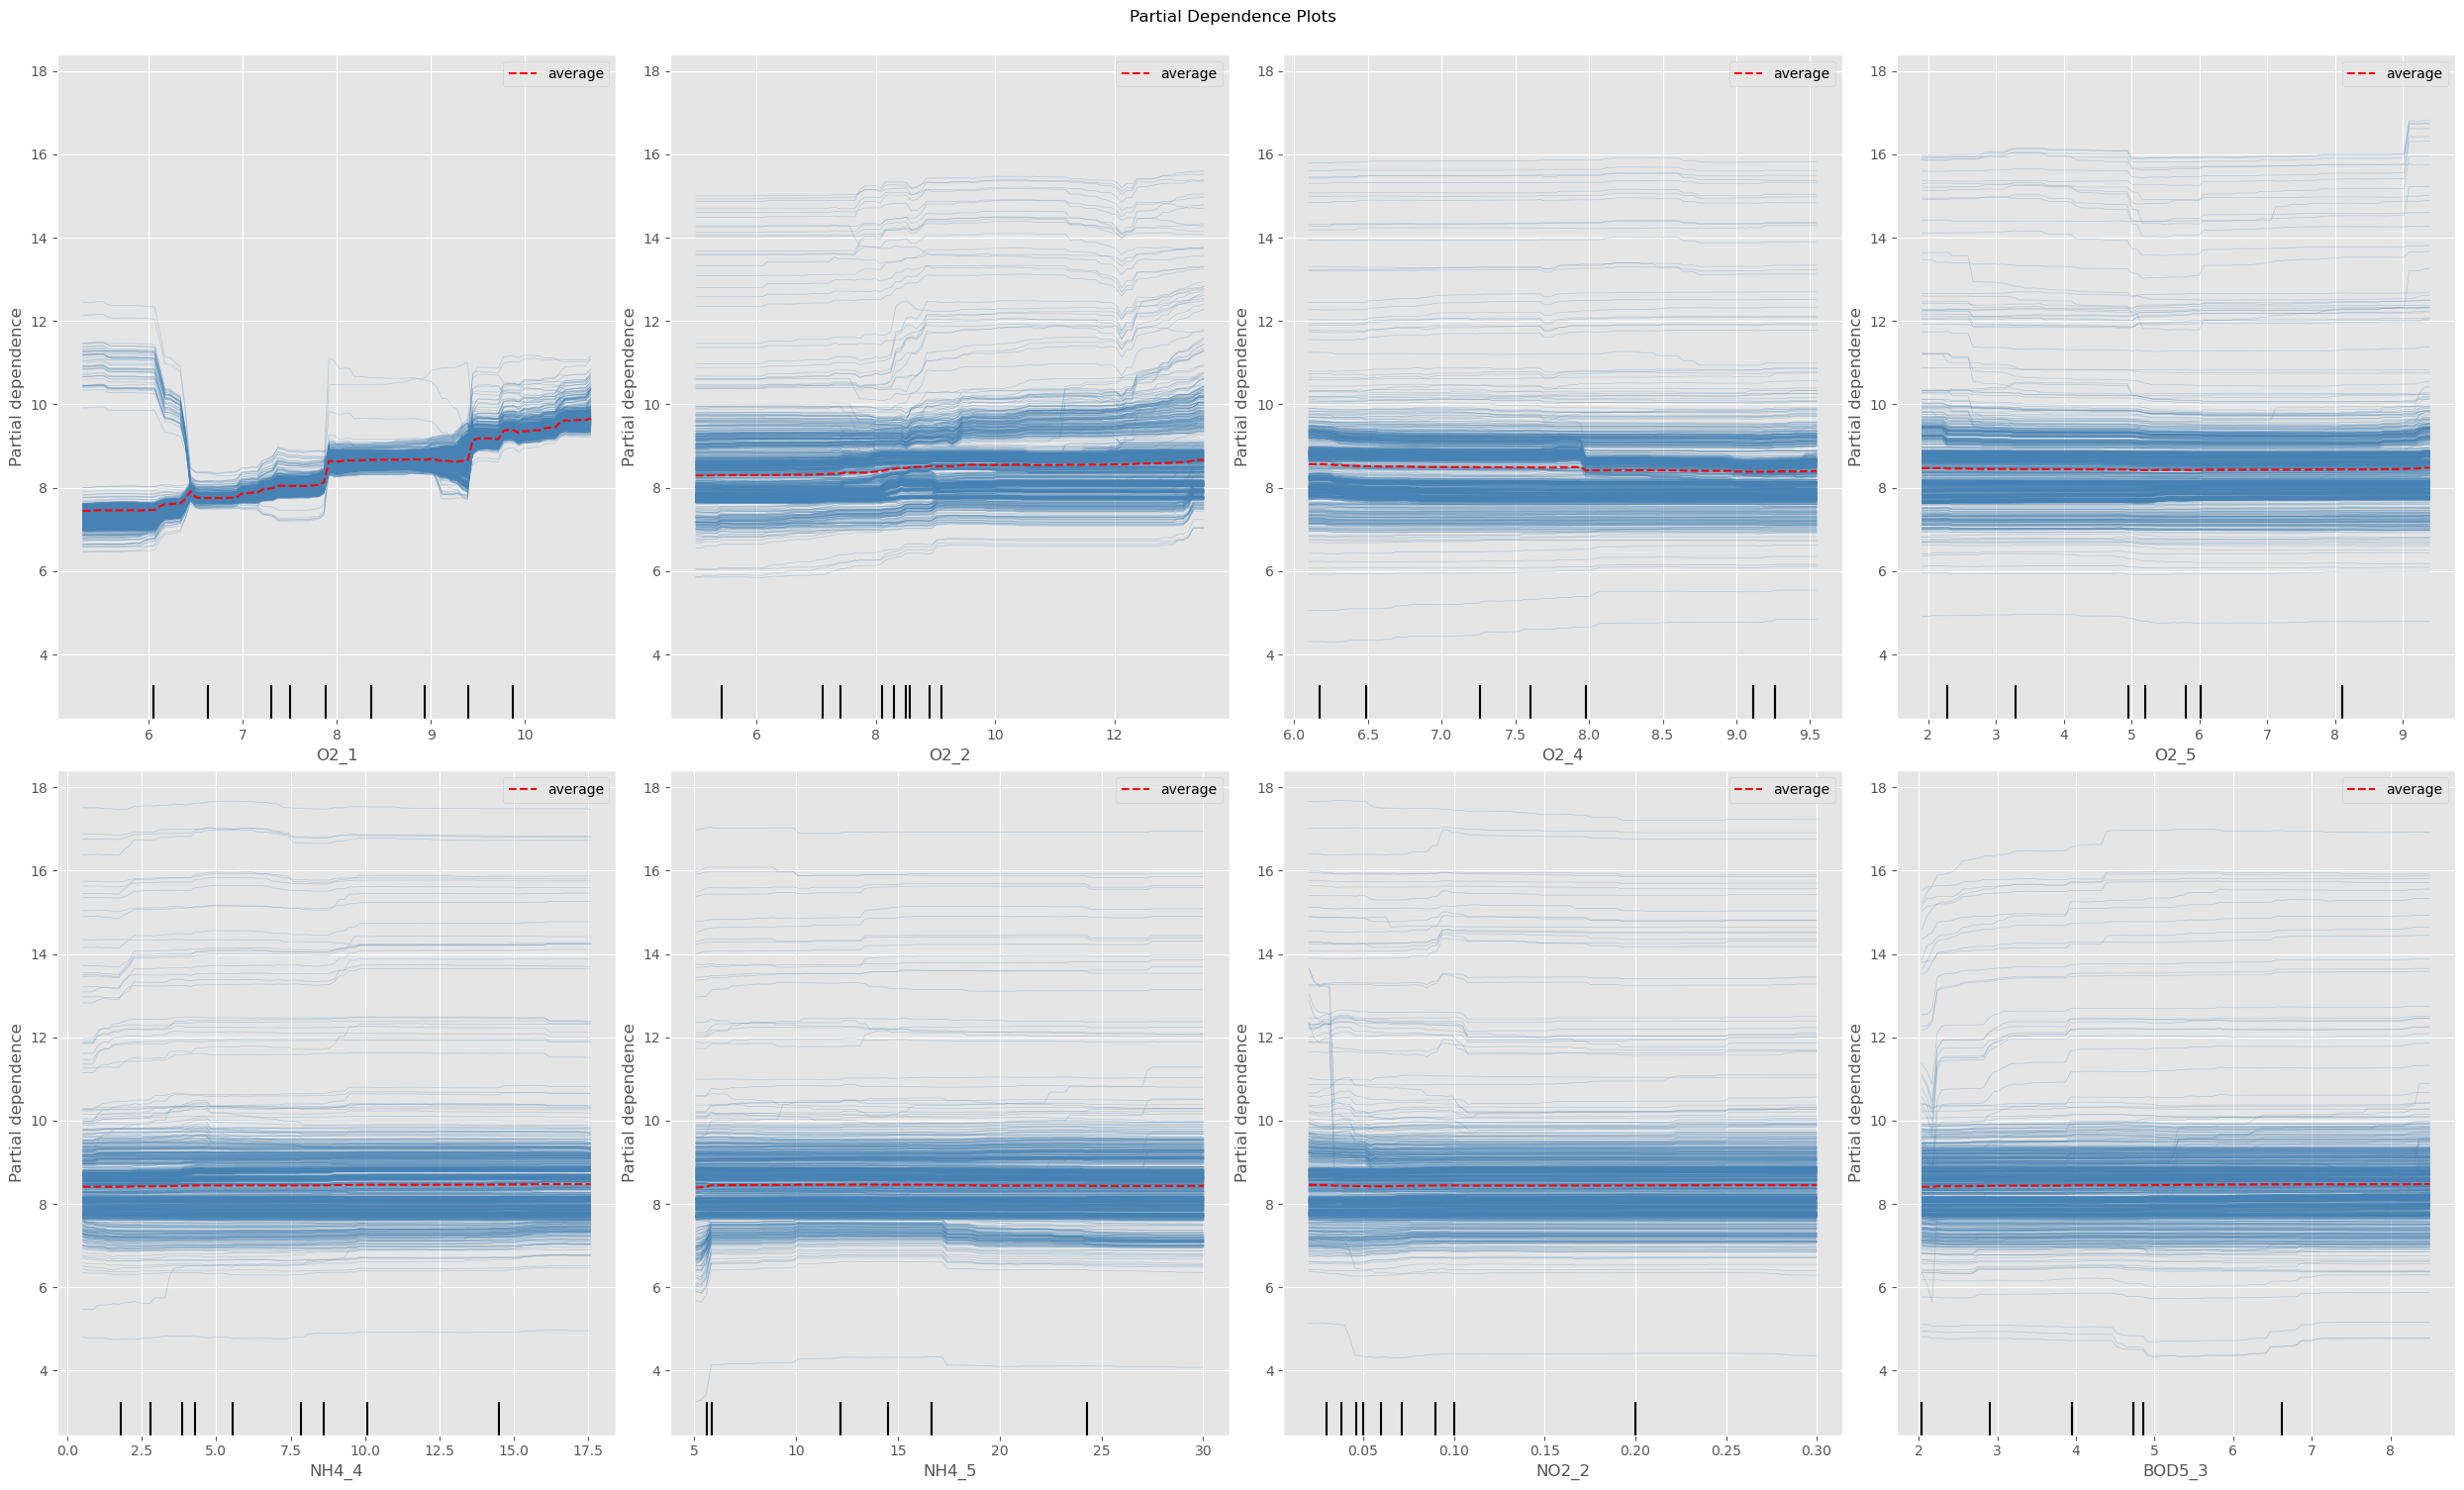

In [25]:
X = train_imp.drop(columns = ['id', 'target'], axis = 1)
Y = train_imp['target']

model = RandomForestRegressor(n_estimators = 1000,
                              max_depth = 7,
                              n_jobs = -1,
                              random_state = 42).fit(X, Y)

if n > 8:
    fig, axs = plt.subplots(3, 4, figsize = (25, 15))
else:
    fig, axs = plt.subplots(2, 4, figsize = (25, 15))
    
plt.suptitle('Partial Dependence Plots', y = 1.0)
PartialDependenceDisplay.from_estimator(model, X, X.columns.tolist(), 
                                        pd_line_kw = {"color": "red"},
                                        ice_lines_kw = {"color": "steelblue"},
                                        kind = 'both', 
                                        ax = axs.ravel()[:len(X.columns.tolist())])

plt.tight_layout(h_pad = 0.5, w_pad = 0.5)
plt.show();

The above plots suggest that some of the features can be clipped. Finally, we clip some of the features and see the effect in cv-rmse score.

In [26]:
train_no_outlier_imp_clip = train_no_outlier_imp

train_no_outlier_imp_clip['O2_4'] = train_no_outlier_imp_clip['O2_4'].clip(None, 9)
train_no_outlier_imp_clip['NH4_4'] = train_no_outlier_imp_clip['NH4_4'].clip(None, 15)
train_no_outlier_imp_clip['NH4_5'] = train_no_outlier_imp_clip['NH4_5'].clip(None, 25)
train_no_outlier_imp_clip['NO2_2'] = train_no_outlier_imp_clip['NO2_2'].clip(None, 0.25)
train_no_outlier_imp_clip['BOD5_3'] = train_no_outlier_imp_clip['BOD5_3'].clip(None, 7)

train_no_outlier_imp_clip.to_csv('train_no_outlier_imp_clip.csv', index = False)

Finally, we re-run the cv-routine to see of clipping some of the features help to improve the cv-rmse score.

In [27]:
X = train_no_outlier_imp_clip[feat_imp[:n]]
Y = train_no_outlier_imp_clip['target']
results = feat_cv_experiments_help(X, Y)
print('The 10-fold oof RMSE (data without outliers and clipped important features) is', results)

The 10-fold oof RMSE (data without outliers and clipped important features) is 1.041801557664326


One more clip in the `target` variable.



In [28]:
train_no_outlier_imp_clip['target'] = train_no_outlier_imp_clip['target'].clip(5, 20)
X = train_no_outlier_imp_clip[feat_imp[:n]]
Y = train_no_outlier_imp_clip['target']
results = feat_cv_experiments_help(X, Y)
print('The 10-fold oof RMSE (data without outliers and clipped important features and target) is', results)

The 10-fold oof RMSE (data without outliers and clipped important features and target) is 1.0145164180231085


In [29]:
train_no_outlier_imp_clip.to_csv('train_no_outlier_imp_clip_target.csv', index = False)

<a id="6"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 2.0</h1>

Coming soon...